# ArcGIS Python API - Finding Content
The ArcGIS community shares a vast amount of data via ArcGIS Online Services. Here we examine some approaches to finding resources to meet your needs and either getting them into your coding environment or downloading to your local machine. 

Here we examine the code used to search for and access various content items using the ArcGIS Python API. 

* Resources:
 * https://developers.arcgis.com/python/guide/accessing-and-creating-content/#Searching-for-content
 * https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.search

In [8]:
#Import the GIS module and authenticate
from arcgis import GIS
gis = GIS('pro')

In [12]:
#Search for the Watershed Boundaries datasets
searchString = 'Watershed Boundaries owner:Federal_User_Community'
search_results = gis.content.search(searchString,       #Set the query string
                                    max_items=100,      #Set the max number of items returned
                                    outside_org=True,   #Allow a search outside the organization
                                   )

In [13]:
#What kind of object is returned?
type(search_results)

list

In [15]:
#How many items in this object
len(search_results)

5

In [16]:
#List the items in the list
search_results

[<Item title:"Watershed Boundaries" type:Map Image Layer owner:Federal_User_Community>,
 <Item title:"Great Smoky Mountains Watersheds" type:Web Map owner:Federal_User_Community>,
 <Item title:"Hydrography Viewer" type:Web Mapping Application owner:Federal_User_Community>,
 <Item title:"Great Smoky Mountains Downstream Flow Path" type:Web Map owner:Federal_User_Community>,
 <Item title:"Great Smoky Mountains Watersheds" type:Feature Layer Collection owner:Federal_User_Community>]

<Item title:"Watershed Boundaries" type:Map Image Layer owner:Federal_User_Community>
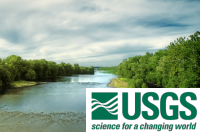

<Item title:"Great Smoky Mountains Watersheds" type:Web Map owner:Federal_User_Community>
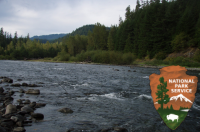

<Item title:"Hydrography Viewer" type:Web Mapping Application owner:Federal_User_Community>
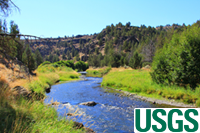

<Item title:"Great Smoky Mountains Downstream Flow Path" type:Web Map owner:Federal_User_Community>
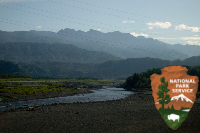

<Item title:"Great Smoky Mountains Watersheds" type:Feature Layer Collection owner:Federal_User_Community>
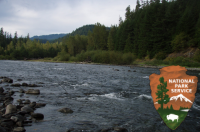

In [17]:
#Display the results as HTML objects
from IPython.display import display
for item in search_results:
    display(item)

With a list of search items, we next narrow in on a single item and explore its properties...

In [45]:
#Extract the first result to a variable
item = search_results[0]
type(item)

arcgis.gis.Item

<Item title:"Watershed Boundaries" type:Map Image Layer owner:Federal_User_Community>
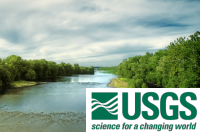

In [46]:
#Display the item
item

In [51]:
#Reveal its ID:
item.id

'4c08f2e2b13741da96ad4a8f6aa5e36a'

In [27]:
#Reveal its URL
item.url

'http://services2.arcgis.com/FiaPA4ga0iQKduv3/arcgis/rest/services/GRSM_WATERSHEDS/FeatureServer'

In [47]:
#Reveal the service type
item.type

'Map Service'

Now that we have the item's **id** and its **URL**, let's see how these come in handy...

---
### Fetching an item via its ID
If you know the ID of a particular AGOL resource, you can avoid searching and fetch it directly using `gis.content.get()`:

<Item title:"Watershed Boundaries" type:Map Image Layer owner:Federal_User_Community>
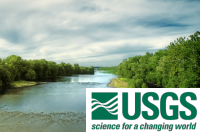

In [52]:
#Fetch an item directly from its url
newItem = gis.content.get('4c08f2e2b13741da96ad4a8f6aa5e36a')
newItem

► EXERCISE: 
* What item has the id: 3ccf118ed80748909eb85c6d262b426f?
* What type of item is this? 

In [ ]:
#Show the item with the ID 4c08f2e2b13741da96ad4a8f6aa5e36a
theOtherItem = █████
theOtherItem

In [ ]:
#Show the type of item this is
theOtherItem.██████

### Extracting _layers_ from an item
Recall that items can be of different types. The Watershed Boundary's item we retrieved from our search is a "Map Service". This means it contains one or more layers. We can tap into these layers an use them in our code. 

First, let's examine what layers are included via the item's REST endpoint, i.e., the url associated with the item. Open the url in your web browser: https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer

You'll see a list of layers included in the service. Here, we have 8 layers. Click on the [2-digit HU (Region)] layer link to see metadata on that layer. 

Now, let's do this programmatically. 

In [57]:
#Reveal the layers associated with the map service item
layers = item.layers

[<FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/0">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/1">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/2">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/3">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/4">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/5">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/6">,
 <FeatureLayer url:"https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/7">]

In [59]:
#Or we can iterate through these and display each layer's name
for layer in item.layers:
    print(layer.properties.name)

WBDLine
2-digit HU (Region)
4-digit HU (Subregion)
6-digit HU (Basin)
8-digit HU  (Subbasin)
10-digit HU (Watershed)
12-digit HU (Subwatershed)
14-digit HU


In [63]:
#Now we can get the HUC2 layer as its own object
HUC2_layer = item.layers[1]
HUC2_layer.properties.name

'2-digit HU (Region)'

In [69]:
#We can also reveal the URL associated with the layer
HUC2_layer.url

'https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/1'

### Fetching a feature layer from its url
We can pull the data associated with that layer into Python using the ArcGIS Python API. However, this requires importing a new arcgis API class: the [FeatureLayer](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer) object (part of the [features](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#) module). Once that class is available, we create a FeatureLayer object just by passing the REST url for that layer. 

In [ ]:
#import the FeatureLayer object 
from arcgis.features import FeatureLayer

In [71]:
#Now create a feature layer object using the URL - 8-digitH HUC
HUC8_layer = FeatureLayer('https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/4')
HUC8_layer.properties.name

'8-digit HU  (Subbasin)'

In [76]:
HUC8_layer.properties.extent

{
  "xmin": -19951755.682,
  "ymin": -1622985.366700001,
  "xmax": 20021551.7474,
  "ymax": 11554273.612599999,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  }
}

Now that we have a feature layer, we can do all kinds of things, including querying records or converting to a spatial dataframe.

In [84]:
m = gis.map()
#m.extent = HUC8_layer.properties.extent
m

MapView(layout=Layout(height='400px', width='100%'))

### Task: Putting it all together
* Open `https://services.nconemap.gov/secure/rest/services` in your browser. 
* Navigate to the NC1Map_Census (MapServer) link<br>
  → _How many layers are included in this service?_

* Navigate to the 2010 Census Tracks layer
  → _Record the URL of this link._
  
* Now, in Python